# Statistics for Data Science
  
<img src="../data/stats_intro.png"> </img>

Statistics can be a powerful tool when performing the art of **Data Science (DS)**. From a high-level view, statistics
is the use of mathematics to perform technical analysis of data. A basic visualization such as a bar chart might give you
some high-level information, but with statistics we get to operate on the data in a much more information-driven and
targeted way. The math involved helps us form concrete conclusions about our data rather than just guesstimating. Using
statistics, we can gain deeper and more fine grained insights into how exactly our data is structured and based on that
structure how we can optimally apply other data science techniques to get even more information.

It includes **descriptive statistics** (the study of methods and tools for collecting data, and mathematical models to describe and interpret data) and **inferential statistics** (the systems and techniques for making probability-based decisions and accurate predictions based on incomplete (sample) data).

## Linear Algebra

Linear algebra is a field of mathematics that is universally agreed to be a prerequisite to a deeper understanding of machine learning. Although linear algebra is a large field with many esoteric theories and findings, the nuts and bolts tools and notations taken from the field are practical for machine learning practitioners.

A **scalar** is a number. Examples of scalars are temperature, distance, speed or mass - all quantities that have a magnitude but no "direction", other than positive or negative.

In [1]:
# Import libraries
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from plot_helper import plot_vector

import seaborn as sns
sns.set(style="darkgrid", palette="icefire")

# For reproducibility
np.random.seed(42)

### Vector

A vector is a list of numbers. There are (at least) two ways to interpret what this list of numbers mean: One way to think aof the vector as being a point in space. Then this list of numbers is a way of identifying that point in space, where each number represents the vector's component that dimension. Another way to think of a vector is a magnitude and direction, e.g. velocity. 

An example of a vector is $\hat{a} = \left[ 4, 3\right]$. You can visualize a vector as follows. Use the `plot_vector()` utility function to plot the a vector graphically.

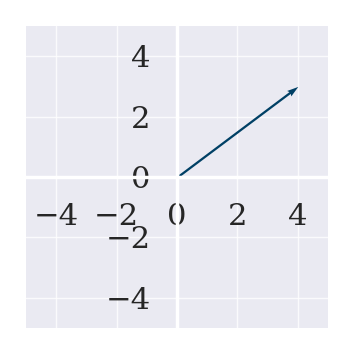

In [2]:
vectors = [(4,3)]
plot_vector(vectors)

#### Note:

The helper function `plot_vector` takes one or two lists as arguments: a list of vectors, and a list of tails (optional). It can plot one vector with its tail on several locations, or several vectors with their tail at one location. It can also plot several vectors with their tails at different locations, but in that case, the two lists have to match in length (if they don't, the function will give an error).

<div class="alert alert-block alert-success">
    
 <b> EXCERCISE 1: </b>
 
 <p> In a new code cell <span style="color:red">(Ctrl+B) </span>, create a list of vectors and plot them. The default tail position is the origin. Then create a list of tail position, and plot the same vectors again at these positions. </p>
    
</div>

### Vector addition and  substraction

Vectors can be added and subtracted. Graphically, we can show vector addition as follows.

Text(0.5, 1.0, 'Adding vectors with coordinates $(4,3)$ and $(1,2)$')

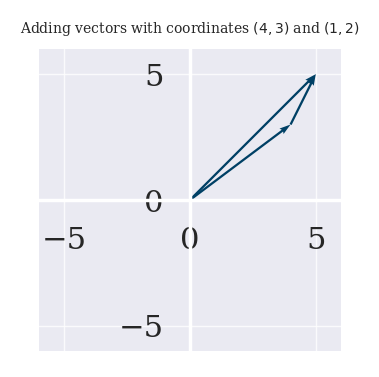

In [3]:
a = np.array([4,3])
b = np.array([1,2])
origin = np.array([0,0])

vectors = [a, b, a + b]
tails = [origin, a, origin]
plot_vector(vectors, tails)
plt.title("Adding vectors with coordinates $(4,3)$ and $(1,2)$")

In this visualization of vector addition, the head of $\mathbf{a} + \mathbf{b}$ ends up at the coordinates  resulting from adding the tail-to-head horizontal and vertical distances of $\mathbf{a}$ and $\mathbf{b}$. In other words, from adding the respective coordinates:

$$
   \left[ \begin{array}{c} 4 \\ 3  \end{array} \right] +  
   \left[ \begin{array}{c} 1 \\ 2  \end{array} \right] =
   \left[ \begin{array}{c} 4+1 \\ 3+2  \end{array} \right]
$$

Let's now look at multiplication by a scalar: essentially, the length of the vector is *scaled* by the scalar factor. If you multiply a vector by $2$, its length (magnitude) doubles. 

For example, if we scale by $2$ the vector $\mathbf{c} = \left[ \begin{array}{c} 2 \\ 1  \end{array} \right]$, it looks like this:

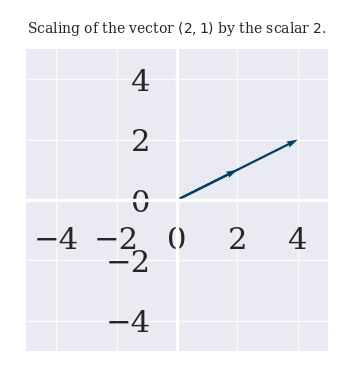

In [4]:
# vector scaling
c = np.array((2,1))
vectors = [c, 2*c]
plot_vector(vectors)
plt.title("Scaling of the vector $(2,1)$ by the scalar $2$.");

The head of the vector $2\mathbf{c}$ ends up at the coordinates resulting from scaling the tail-to-head horizontal and vertical distances of $\mathbf{c}$:

$$
  2\cdot\left[ \begin{array}{c} 2 \\ 1  \end{array} \right] =
  \left[ \begin{array}{c} 2\cdot 2 \\ 2\cdot 1  \end{array} \right]
$$

<div class="alert alert-block alert-success">
    <b> EXCERCISE: </b>
    
   <ul>
    <li> What is the effect of mutiplying a vector by a negative scalar ? Multiply c with a negative scalar and visualize bothe vectors with the <tt>plot_vector</tt> function. </li>
    </ul>
</div>

### Basis vectors

Any horizontal vector (i.e., having zero as its second component) can be scaled to have length $1$. 

For example, the vector $\,\mathbf{u} = \left[ \begin{array}{c} u \\ 0  \end{array} \right]$ scaled by $1/u$ becomes $\left[ \begin{array}{c} 1 \\ 0  \end{array} \right]$.

Similarly, any vertical vector (having zero as its first component) can be scaled to have length $1$.

Going the opposite way, 
- scaling the vector $\,\mathbf{i}=\left[ \begin{array}{c} 1 \\ 0  \end{array} \right]$ can give us all possible horizontal vectors, and 
- scaling the vector $\,\mathbf{j}=\left[ \begin{array}{c} 0 \\ 1  \end{array} \right]$ can give us all possible vertical vectors. 

Since every vector is the sum of a horizontal and a vertical one, it means we can generate *all vectors* by adding scaled versions of $\mathbf{i}$ and $\mathbf{j}$. That's why they are called **basis vectors**.

For any vector, its components are the scalars we need to multiply the basis vectors by to generate it. For example:

$$
 \left[ \begin{array}{c} 3 \\ 2  \end{array} \right] =
 3\cdot\left[ \begin{array}{c} 1 \\ 0  \end{array} \right] +
 2\cdot\left[ \begin{array}{c} 0 \\ 1  \end{array} \right] =
 3\,\mathbf{i} + 2\,\mathbf{j}
$$

### Linear combination and span

Adding two vectors that were each multiplied by a scalar is called a **linear combination** of those two vectors. Thus, we say that every vector is some linear combination of the basis vectors.

This is the **span** of two vectors: the set of all possible linear combinations of the two. 

In the code cell below, we will see 30 random vectors on the plane via a linear combination of the basis vectors $\mathbf{i}$ and $\mathbf{j}$. The scales for these vectors are selected as random integers in an interval (in this case, from **-10** to **10**). 

Text(0.5, 1.0, 'Thirty random vectors, created from the basis vectors $\\mathbf{i}$ and $\\mathbf{j}$')

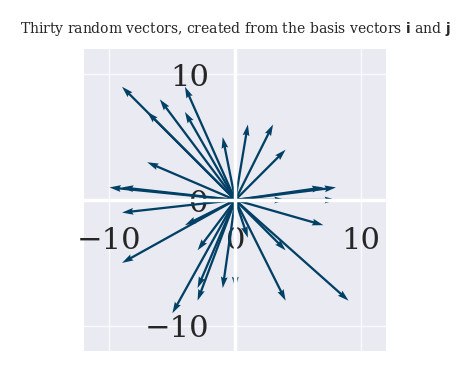

In [5]:
# span
vectors = []
i = np.array([1,0])
j = np.array([0,1])

for _ in range(30):
    m = np.random.randint(-10,10)
    n = np.random.randint(-10,10)
    vectors.append(m*i + n*j)
    
plot_vector(vectors)
plt.title("Thirty random vectors, created from the basis vectors $\mathbf{i}$ and $\mathbf{j}$")

Now, let us generate a span from linear combinations of vector $\mathbf{a}$ and a new vector, $\mathbf{d} = \left[ \begin{array}{c} 1 \\ 0.75 \end{array} \right]$. 

Text(0.5, 1.0, 'Thirty random vectors, created from the basis vectors $\\mathbf{a}$ and $\\mathbf{d}$')

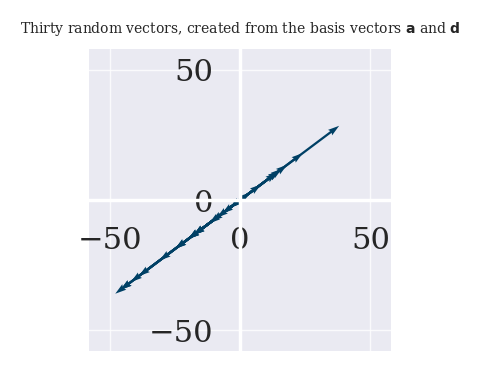

In [6]:
d = np.array([1, 0.75])
vectors = []

for _ in range(30):
    m  = np.random.randint(-10,10)
    n = np.random.randint(-10,10)
    vectors.append(m * a + n * d)
    
plot_vector(vectors)
plt.title("Thirty random vectors, created from the basis vectors $\mathbf{a}$ and $\mathbf{d}$")

The new vector $\mathbf{d}$ is a scaled version of the original vector $\mathbf{a}$, that is to say, these vectors are *collinear*. Therefore, all linear combinations of $\mathbf{a}$ and $\mathbf{d}$ end up in one line, which is their span.

**Definition:**

> A **basis** for a vector space is a set of *linearly independent* vectors that *spans* the space.

We saw above that $\mathbf{d}$ is a scalar multiplied by $\mathbf{a}$: it is linearly _dependent_ with $\mathbf{a}$. The vector $\mathbf{b}$, however, is linearly independent with $\mathbf{a}$. Bring in vector $\mathbf{c}$ now: it can be written as a linear combination of $\mathbf{a}$ and $\mathbf{b}$: $\alpha\, \mathbf{a} + \beta\, \mathbf{b} = \mathbf{c}$, for some scalars $\alpha$ and $\beta$. In 2D space, any third vector will be linearly dependent with $\mathbf{a}$ and $\mathbf{b}$: these two form a _full set_ of independent vectors (and a basis).

### Vector multiplication

There are two principal ways of multiplying vectors, called *dot products* (or scalar products) and *cross products* (or vector products).

A dot product between two vectors $\vec{a}$ and $\vec{b}$ is computed as: 

$$c = \vec{a} \cdot \vec{b} = |\vec{a}| |\vec{b}| cos(\theta)$$, where $\theta$ is the angle between the two vectors.

A cross product between two vectors $\vec{a}$ and $\vec{b}$ is computed as: 

$$\vec{c} = \vec{a} \times \vec{b} = |\vec{a}| |\vec{b}| sin(\theta) \mathbf{n}$$

where $\mathbf{n}$ is a *unit vector* perpendicular to vectors $\vec{a}$ and $\vec{b}$.

In [7]:
a = np.array([1,2])
b = np.array([4,5])
d = np.dot(a,b)
d

14

In [8]:
c = np.cross(a,b) # (1*5) - (2*4)
c

array(-3)

## Matrices

Matrix, like vector, is also a collection of numbers. The difference is that a matrix is a table of numbers rather than a list.

In [9]:
A = np.array([[-2,1], [1,-3]])
A

array([[-2,  1],
       [ 1, -3]])

We can add an subtract matrices in the same way as vectors.

In [10]:
B = np.random.rand(2,2)
B

array([[0.03142919, 0.63641041],
       [0.31435598, 0.50857069]])

In [11]:
np.add(A,B)

array([[-1.96857081,  1.63641041],
       [ 1.31435598, -2.49142931]])

Python (since version 3.5) has a **built-in operator** that computes matrix multiplication `@`.

In [12]:
A@B # or simply, np.matmul(A,B)

array([[ 0.25149761, -0.76425013],
       [-0.91163876, -0.88930166]])

In [13]:
# Determinant
np.linalg.det(A)

5.000000000000001

In [14]:
# Determinant from stack of matrices
a = np.array([ [[1,2], [3,4]],  [[1,2],[2,1]], [[1,3],[3,1]] ])
a

array([[[1, 2],
        [3, 4]],

       [[1, 2],
        [2, 1]],

       [[1, 3],
        [3, 1]]])

In [15]:
np.linalg.det(a)

array([-2., -3., -8.])

A matrix $\mathbf{A}$ is *invertible* if there exists a matrix $\mathbf{A}^{-1}$ such that $\mathbf{A} \mathbf{A}^{-1} = \mathbf{I}$.

In [16]:
Ai = np.linalg.inv(A)
Ai

array([[-0.6, -0.2],
       [-0.2, -0.4]])

In [17]:
np.matmul(A, Ai).astype(int)

array([[1, 0],
       [0, 1]])

## Eigen vectors and Eigen values

Eigen vectors and values feature prominently in the analysis of linear transformations.

The eigenvectors of $A$ get scaled after the transformation, i.e., land on their span:

$$
\begin{align*}
  A \mathbf{v_1} = s_1 \mathbf{v_1} \\
  A \mathbf{v_2} = s_2 \mathbf{v_2}
\end{align*}
$$

The two left-hand sides are matrix-vector multiplications, each giving a vector as result. The two right-hand sides are scalings of a column vector (also resulting in vectors). We would like to combine the two equations together into a matrix equation, leading to the eigendecomposition of $A$.

Matrix-matrix multiplication is the same as applying a transformation via the matrix on the left, to the columns of the matrix on the right. So if we make a matrix with the two eigenvectors as columns, and multiply it with $A$:

$$ A \begin{bmatrix}
    \mathbf{v_1} & \mathbf{v_2}
    \end{bmatrix}
    = \begin{bmatrix}
    A\mathbf{v_1} & A\mathbf{v_2}
    \end{bmatrix}
$$

We can now re-write the eigenvector equations into one matrix equation by matching columns:

$$ A \begin{bmatrix}
    \mathbf{v_1} & \mathbf{v_2}
    \end{bmatrix}
    = \begin{bmatrix}
    s_1\mathbf{v_1} & s_2\mathbf{v_2}
    \end{bmatrix}
$$

Using $C$ to denote the matrix of eigenvectors, the left-hand side of this matrix equation is $A\, C$.  We can express the right-hand side of the combined eigenvector equations also using $C$, by working with each column:

$$ s_1 \mathbf{v_1} = \begin{bmatrix}
    \mathbf{v_1} & \mathbf{v_2} \end{bmatrix} \,
    \begin{bmatrix}
    s_1 \\
    0 
    \end{bmatrix} 
$$

$$ s_2 \mathbf{v_2} = \begin{bmatrix}
    \mathbf{v_1} & \mathbf{v_2} \end{bmatrix} \,
    \begin{bmatrix}
    0 \\
    s_2 
    \end{bmatrix} 
$$

Matchng the columns, and applying our first idea for matrix-matrix multiplication: 

$$  \begin{bmatrix}
    s_1\mathbf{v_1} & s_2\mathbf{v_2}
    \end{bmatrix}
    = C\, 
    \begin{bmatrix}
    s_1 & 0 \\
    0 & s_2
    \end{bmatrix}  
$$

Using $D$ to denote the diagonal matrix of eigenvalues, this all comes together as:

$$
  A\, C = C\, D
$$

If we right-multiply by $C^{-1}$ on both sides:

$$
  A = C\, D\, C^{-1}
$$

A matrix that can be decomposed in this way is called **diagonalizable**.
Multiplying on the right by $C$ and on the left by $C^{-1}$:

$$
  C^{-1} A\, C = D
$$


If you go back to the previous lesson, you will find an expression that looks like this for applying a known transformation to a vector in a new basis. Review that section if you need to.

Applying the transformation $A$ to a vector in standard basis, $\mathbf{x}$, is:

$$
  A\, \mathbf{x} = C\, D\, C^{-1}\mathbf{x}
$$

Viewing $C$ as a change of basis, the expression on the right means we change $\mathbf{x}$ to a new basis of eigenvectors, apply a scaling by the eigenvalues in the new coordinate system, and change back to the standard basis. The effect is the same as the transformation $A$: the matrices $A$ and $D$ are called **similar**.

### Compute Eigen values

You can compute the eigenvalues and eigenvectors of a matrix using `numpy.linalg.eig()`. It returns a tuple: its first element is an array with eigen values, its second element is a 2D array, where each column is an eigenvector.

In [18]:
np.linalg.eig(A)[0]

array([-1.38196601, -3.61803399])

In [19]:
np.linalg.eig(A)[1]

array([[ 0.85065081, -0.52573111],
       [ 0.52573111,  0.85065081]])

In [20]:
# display each eigenvalue with corresponding eigenvector
evalues, evectors= np.linalg.eig(A)

for eva, eve in zip(evalues, evectors.T):
    print(eva, eve)

-1.381966011250105 [0.85065081 0.52573111]
-3.618033988749895 [-0.52573111  0.85065081]


Note the `.T` operation in the above for loop. This is because in the natural order, the iteration advances over the first dimension: the rows. The eigen vectors correspond to each column, to get that we need to transpose. 

To create the diagonal matrix of eigenvalues, use `numpy.diag()` function.

In [21]:
np.diag(evalues)

array([[-1.38196601,  0.        ],
       [ 0.        , -3.61803399]])

To verify the decomposition, check:

In [22]:
C = evectors
A_decomp = C @ np.diag(evalues) @ np.linalg.inv(C)
A_decomp

array([[-2.,  1.],
       [ 1., -3.]])

## Probability Review

See slides for probability review.

## Probability Distributions

Let's walk through some of the most commonly used probability distributions using NumPy. 

We shall also be using another Python package `Scipy` (Refer to [scipy.org](https://docs.scipy.org/doc/) for more details). Install package `scipy` using PyCharm package manager.

In [23]:
# Setup plot styles.
plt.rcParams['figure.dpi'] = 100
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['axes.titlesize'] = 20

### Uniform Distribution

The probability density function of a uniform distribution is:

$$
f(x) = \begin{cases}
  \frac{1}{b-a} & \text{if } a \leq x \leq b,\\
  0   & \text{for } x < a \text{ or } x > b
\end{cases}
$$

In [24]:
# Import uniform distribution

from scipy.stats import uniform

In [25]:
# Generate random numbers from uniform distribution
n = 1000
start = 10 # a = start
scale = 20 # b = start + scale

data = uniform.rvs(size=n, loc=start, scale=scale)

(Text(0.5, 0, 'Data'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Uniform Distribution'))

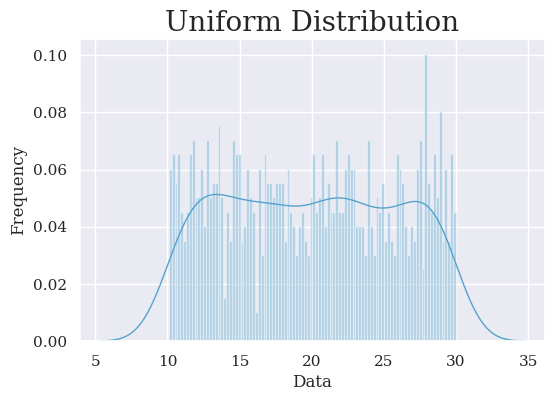

In [26]:
ax = sns.distplot(data, bins=100, kde=True)
ax.set_xlabel('Data'), ax.set_ylabel('Frequency'), ax.set_title('Uniform Distribution')

### Normal Distribution

The probability density function for a normal distribution with mean $\mu$ and std $\sigma$ is defined as:

<font size="3">
$$
f(x | \mu, \sigma^2) = \frac{1}{\sqrt{2 \pi}\sigma} \exp^{-\frac{\left(x-\mu\right)^2}{2\sigma^2}}
$$
</font>

In [27]:
from scipy.stats import norm

In [28]:
n = 1000
mu = 0
sigma = 1
data = norm.rvs(size=n, loc=mu, scale=sigma)

(Text(0.5, 0, 'Data'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Normal Distribution'))

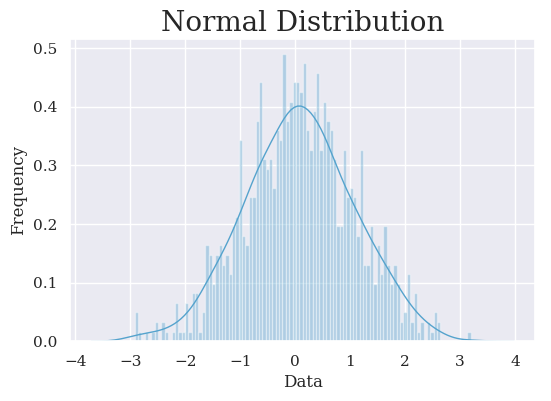

In [29]:
ax = sns.distplot(data, bins=100, kde=True)
ax.set_xlabel('Data'), ax.set_ylabel('Frequency'), ax.set_title('Normal Distribution')

### Gamma Distribution

The *gamma distribution* is a two-parameter family of continuous probability distributions. The gamma distribution can be parameterized in terms of a *shape parameter*, $\alpha$ and an inverse scale parameter $\beta$, called a *rate parameter*. The probability density funtion is written as:

<font size="3">
$$
    f(x|\alpha,\beta) = \frac{\beta^\alpha x^{\alpha-1}}{\Gamma \left(\alpha \right)} e^{-\beta x}
$$
</font>

Here, $\Gamma(n)$ is the *gamma function* and is defined as $(n-1)!$.

In [30]:
from scipy.stats import gamma

In [31]:
n = 1000
data = gamma.rvs(a=5,size=n)

(Text(0.5, 0, 'Data'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Gamma Distribution'))

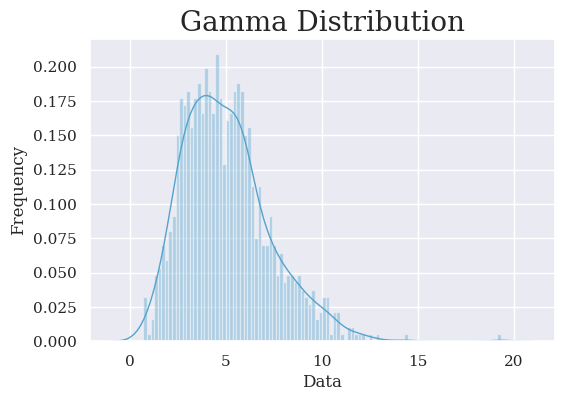

In [32]:
ax = sns.distplot(data, bins=100, kde=True)
ax.set_xlabel('Data'), ax.set_ylabel('Frequency'), ax.set_title('Gamma Distribution')

### Poisson Distribution

Poisson random variable is typically used to model the number of times an event happened in a time interval. For example, the number of users visited on a website in an interval can be thought of a Poisson process. Poisson distribution is described in terms of the rate $\mu$ at which the events happen. An event can occur 0,1,2,... times in an interval. The average number of events in an interval is defined as $\lambda$. The probability of observing $k$ events in an interval is given by:

<font size="3">
$$
P(k \, \text{events in an interval}) = e^{-k} \frac{\lambda^k}{k!}
$$
   </font>

**Note:** The normal distribution is a limiting case of Poisson distribution when $\lambda \rightarrow \infty$. 

An example of Poisson distribution is as follows (ref:[wiki](https://en.wikipedia.org/wiki/Poisson_distribution)). On a particular river, overflow floods occur once every 100 years on average. Calculate the probability of k = 0, 1, 2, 3, 4, 5, or 6 overflow floods in a 100-year interval, assuming the Poisson model is appropriate.

Since average overflow rate is once in 100 years, $\lambda = 1$.

$$
\begin{align*}
P(k=0 \, \text{floods in 100 years}) &= e^0 \frac{1^0}{0!} \approx 0.368 \\
P(k=1 \, \text{floods in 100 years}) &= e^1 \frac{1^1}{1!} \approx 0.368 \\
P(k=2 \, \text{floods in 100 years}) &= e^2 \frac{1^2}{2!} \approx 0.184
\end{align*}
$$

In [33]:
from scipy.stats import poisson

In [34]:
data = poisson.rvs(mu=3, size=10000) # \mu = \lambda

(Text(0.5, 0, 'Data'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Poisson Distribution'))

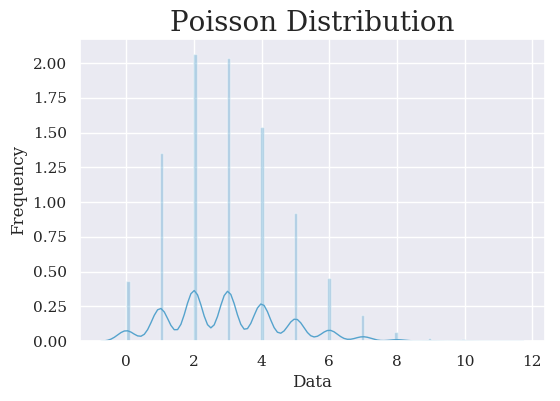

In [35]:
ax = sns.distplot(data, bins=100, kde=True)
ax.set_xlabel('Data'), ax.set_ylabel('Frequency'), ax.set_title('Poisson Distribution')

### Binomial Distribution

The parameters of a *binomial distribution* are $n$ and $p$ where $n$ is the *total number of trials*, and $p$ is the *probability of success in each trial*. The probability mass function is given by:

<font size="3">
 $$
   f(k,n,p) = P( k | n,p) = P(X = k) = {n \choose k} p^{k} (1-p)^{n-k}
 $$
    </font>

In [36]:
from scipy.stats import binom

In [37]:
numTrials = 100
prob = 0.8
n = 1000
data = binom.rvs(n=numTrials, p=prob, size=n)

(Text(0.5, 0, 'Data'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Binomial Distribution'))

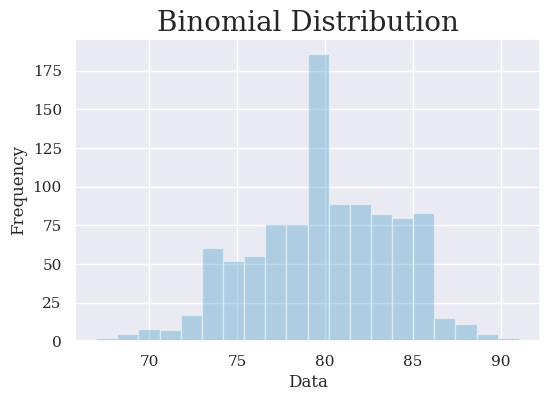

In [38]:
ax = sns.distplot(data, kde=False)
ax.set_xlabel('Data'), ax.set_ylabel('Frequency'), ax.set_title('Binomial Distribution')

### Multinomial Distribution

A *multinomial distribution* is a generalization of the binomial distribution. For example, it models the probability of counts for each side of a $k$-sided die rolled $n$ times. Let $X = (x_1, x_2, \cdots x_k)$ be $k$ independent events, each with probability $p_1, p_2, \cdots p_k$. The probability mass function can be expressed as:

$$
f(x_1, x_2 \cdots x_k; p_1, p_2 \dots p_k) = \begin{align*}\begin{cases}
\dfrac{n!}{x_1! x_2! \dots x_{k}!} p_{1}^{x_1} \times p_{2}^{x_2} \cdots \times p_{k}^{x_k}, & \text{where } \sum_{i} x_i = n \\
\; 0,   & \text{otherwise}
\end{cases}\end{align*}
$$

In [39]:
from scipy.stats import multinomial

In [40]:
numTrials = 100
prob = [1/3]*3
n = 1000
data = multinomial.rvs(n=numTrials, p=prob, size=n)

[Text(0.5, 54.75, 'Data')]

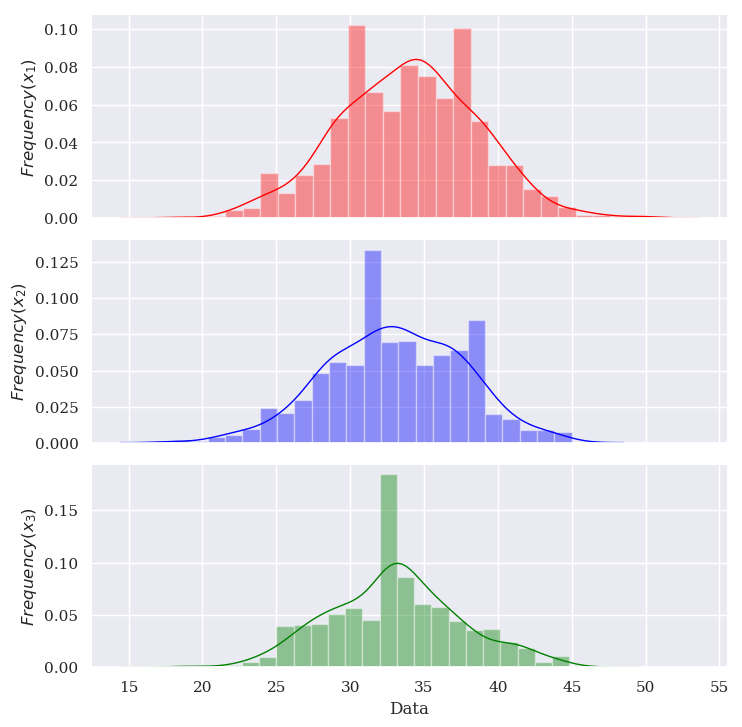

In [41]:
f, axes = plt.subplots(3, 1, figsize=(7,7), sharex=True)
f.tight_layout()
sns.despine(left=True)

sns.distplot(data[:,0], color='red',  ax=axes[0])
sns.distplot(data[:,1], color='blue', ax=axes[1])
sns.distplot(data[:,2], color='green',ax=axes[2])

for i, ax in enumerate(axes):
    ax.set_ylabel(f'$Frequency(x_{i+1})$')
    
plt.setp(axes[2], xlabel='Data')

### Bernoulli Distribution

A *Bernoulli distribution* has only two possible outcomes, namely 1 (success) and 0 (failure), and a single trial, for example, a coin toss. So the random variable $X$ which has a Bernoulli distribution can take value 1 with the probability of success, $p$, and the value 0 with the probability of failure, $1−p$. The Bernoulli distribution is a special case of binomial distribution where a single trial is conducted ($n = 1$). The probability mass function is:

$$
f(k;p) = p^k (1-p)^{1-k}, \text{for } k \in [0,1]
$$

In [42]:
from scipy.stats import bernoulli

In [43]:
data = bernoulli.rvs(size=1000, p=0.6)

(Text(0.5, 0, 'Data'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Bernoulli Distribution'))

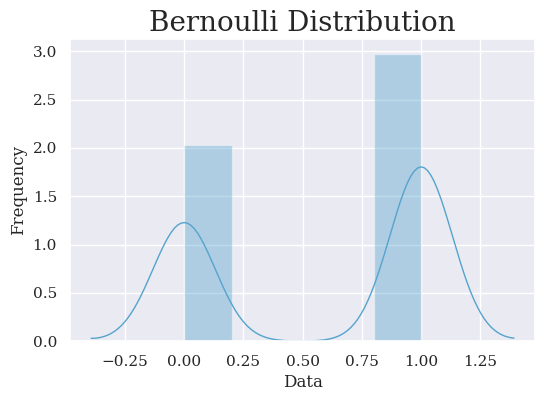

In [44]:
ax = sns.distplot(data, kde=True)
ax.set_xlabel('Data'), ax.set_ylabel('Frequency'), ax.set_title('Bernoulli Distribution')

In [45]:
# List of other probability distributions
import scipy
[d for d in dir(scipy.stats.distributions) if d.find('_') == -1]

['alpha',
 'anglit',
 'arcsine',
 'argus',
 'bernoulli',
 'beta',
 'betaprime',
 'binom',
 'boltzmann',
 'bradford',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'cosine',
 'crystalball',
 'dgamma',
 'division',
 'dlaplace',
 'dweibull',
 'entropy',
 'erlang',
 'expon',
 'exponnorm',
 'exponpow',
 'exponweib',
 'f',
 'fatiguelife',
 'fisk',
 'foldcauchy',
 'foldnorm',
 'gamma',
 'gausshyper',
 'genexpon',
 'genextreme',
 'gengamma',
 'genhalflogistic',
 'genlogistic',
 'gennorm',
 'genpareto',
 'geom',
 'gilbrat',
 'gompertz',
 'halfcauchy',
 'halfgennorm',
 'halflogistic',
 'halfnorm',
 'hypergeom',
 'hypsecant',
 'invgamma',
 'invgauss',
 'invweibull',
 'johnsonsb',
 'johnsonsu',
 'kappa3',
 'kappa4',
 'ksone',
 'kstwobign',
 'laplace',
 'levy',
 'loggamma',
 'logistic',
 'loglaplace',
 'lognorm',
 'logser',
 'lomax',
 'maxwell',
 'mielke',
 'moyal',
 'nakagami',
 'nbinom',
 'ncf',
 'nct',
 'ncx2',
 'norm',
 'norminvgauss',
 'pareto',
 'pearson3',
 'planck',
 'poisson',
 'powerla